Text(0.5, 0, 'Time $t$ (s)')

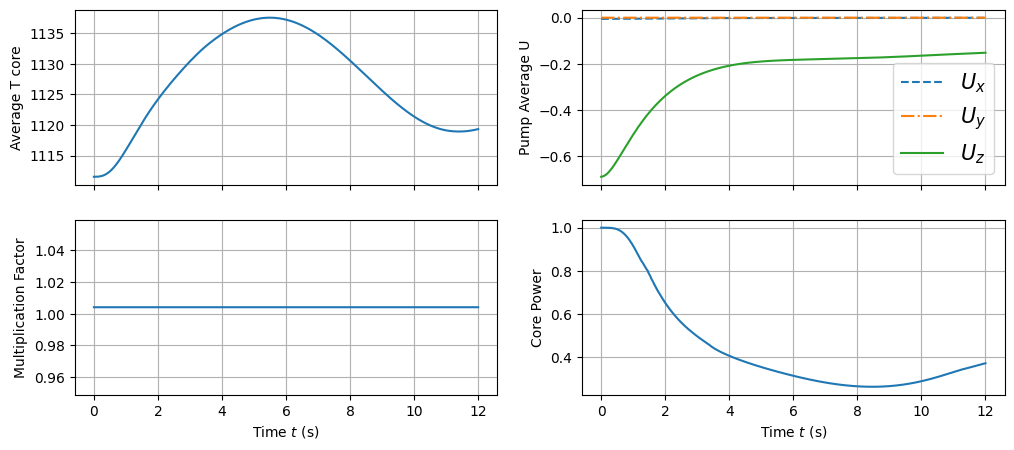

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re

def read_ave_U(filename):
    times = []
    values = []

    # Regular expression pattern to match numbers in parentheses
    pattern = r'\((-?\d+\.\d+e[+-]\d+)\s+(-?\d+\.\d+e[+-]\d+)\s+(-?\d+\.\d+e[+-]\d+)\)'
    
    with open(filename, 'r') as file:
        for line in file:
            # Match numbers in parentheses and the first column
            match = re.match(r'(\d+\.\d+)\s+' + pattern, line)
            if match:
                time = float(match.group(1))
                times.append(time)
                values_str = match.groups()[1:]
                values.append([float(x) for x in values_str])
    
    return np.array(times), np.array(values)

meanTcore = np.loadtxt('./postProcessing/meanTcore/0/volFieldValue.dat', skiprows=4)
pumpAveU  = read_ave_U('./postProcessing/pumpAverageVelocity/0/volFieldValue.dat')
reactor_parameters = np.loadtxt('./postProcessing/reactorParameters/0/reactorParameters.dat', skiprows=2)


fig, axs = plt.subplots(2, 2, sharex=True, figsize=(12,5))
axs = axs.flatten()

axs[0].plot(meanTcore[:,0], meanTcore[:,1])
axs[0].set_ylabel('Average T core')
axs[0].grid()

axs[1].plot(pumpAveU[0], pumpAveU[1][:, 0], '--', label='$U_x$')
axs[1].plot(pumpAveU[0], pumpAveU[1][:, 1], '-.', label='$U_y$')
axs[1].plot(pumpAveU[0], pumpAveU[1][:, 2], label='$U_z$')
axs[1].set_ylabel('Pump Average U')
axs[1].grid()
axs[1].legend(fontsize=15)

axs[2].plot(reactor_parameters[1:,0], reactor_parameters[1:,1])
axs[2].set_ylabel(r'Multiplication Factor')
axs[2].grid()
axs[2].set_xlabel(r'Time $t$ (s)')

axs[3].plot(reactor_parameters[1:,0], reactor_parameters[1:,3] / reactor_parameters[1,3])
axs[3].set_ylabel(r'Core Power')
axs[3].grid()
axs[3].set_xlabel(r'Time $t$ (s)')